In [1]:
import data_loader
import numpy as np
import pandas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
# load data and assign names
trdf, valdf = data_loader.load_train_data("data/adult.data", is_df=True)
## adding columns labels https://chartio.com/resources/tutorials/how-to-rename-columns-in-the-pandas-python-library/
trdf.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
,"target"]
valdf.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
,"target"]

In [56]:
Xtr = trdf.drop('target',axis=1)
Ytr = target_binarizer(trdf['target'])

In [58]:
Xva = valdf.drop('target', axis=1)
Yva = target_binarizer(valdf['target'])


## Test data

In [59]:
# load data and assign names
testdf = data_loader.load_test_data("data/adult.data", is_df=True)
## adding columns labels https://chartio.com/resources/tutorials/how-to-rename-columns-in-the-pandas-python-library/
testdf.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
,"target"]



In [60]:
Xts = testdf.drop('target',axis=1)
Yts = target_binarizer(testdf['target'])
print(Xts.shape)
print(Yts.shape)

(32560, 14)
(32560, 1)


# Data Exploration

## Test data

In [4]:
trdf.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [5]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29315 entries, 24337 to 10137
Data columns (total 15 columns):
age               29315 non-null int64
workclass         29315 non-null object
fnlwgt            29315 non-null int64
education         29315 non-null object
education-num     29315 non-null int64
marital-status    29315 non-null object
occupation        29315 non-null object
relationship      29315 non-null object
race              29315 non-null object
sex               29315 non-null object
capital-gain      29315 non-null int64
capital-loss      29315 non-null int64
hours-per-week    29315 non-null int64
native-country    29315 non-null object
target            29315 non-null object
dtypes: int64(6), object(9)
memory usage: 3.6+ MB


In [6]:
import seaborn as sns

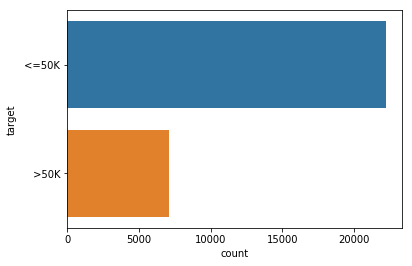

In [7]:
sns.countplot(y='target', data=trdf)

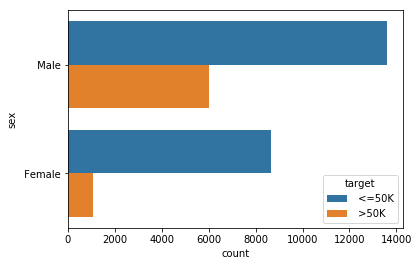

In [8]:
sns.countplot(y='sex', hue='target', data=trdf)

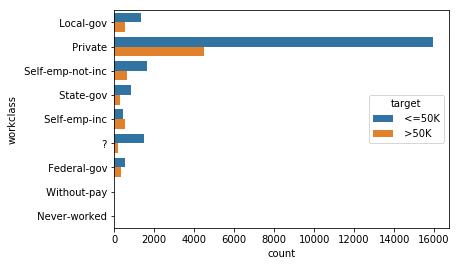

In [9]:
sns.countplot(y='workclass', hue='target', data=trdf)

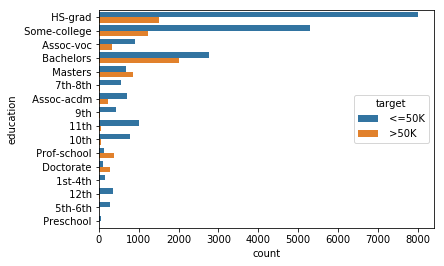

In [10]:
sns.countplot(y='education', hue='target', data=trdf)

In [11]:
trdf[trdf['education-num'] == 16]['education'].unique()

array([' Doctorate'], dtype=object)

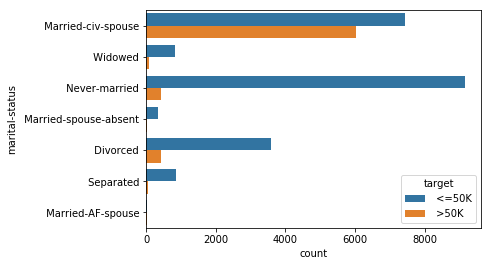

In [12]:
sns.countplot(y='marital-status', hue='target', data=trdf)

In [13]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29315 entries, 24337 to 10137
Data columns (total 15 columns):
age               29315 non-null int64
workclass         29315 non-null object
fnlwgt            29315 non-null int64
education         29315 non-null object
education-num     29315 non-null int64
marital-status    29315 non-null object
occupation        29315 non-null object
relationship      29315 non-null object
race              29315 non-null object
sex               29315 non-null object
capital-gain      29315 non-null int64
capital-loss      29315 non-null int64
hours-per-week    29315 non-null int64
native-country    29315 non-null object
target            29315 non-null object
dtypes: int64(6), object(9)
memory usage: 4.8+ MB


# Data Preprocessing

## binning categories

In [14]:
trdf['education'].replace(' Preschool', 'dropout',inplace=True)
trdf['education'].replace(' 10th', 'dropout',inplace=True)
trdf['education'].replace(' 11th', 'dropout',inplace=True)
trdf['education'].replace(' 12th', 'dropout',inplace=True)
trdf['education'].replace(' 1st-4th', 'dropout',inplace=True)
trdf['education'].replace(' 5th-6th', 'dropout',inplace=True)
trdf['education'].replace(' 7th-8th', 'dropout',inplace=True)
trdf['education'].replace(' 9th', 'dropout',inplace=True)
trdf['education'].replace(' HS-Grad', 'HighGrad',inplace=True)
trdf['education'].replace(' HS-grad', 'HighGrad',inplace=True)
trdf['education'].replace(' Some-college', 'CommunityCollege',inplace=True)
trdf['education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
trdf['education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
trdf['education'].replace(' Bachelors', 'Bachelors',inplace=True)
trdf['education'].replace(' Masters', 'Masters',inplace=True)
trdf['education'].replace(' Prof-school', 'Masters',inplace=True)
trdf['education'].replace(' Doctorate', 'Doctorate',inplace=True)

In [15]:
trdf[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
2,Doctorate,16.000000
4,Masters,14.251816
0,Bachelors,13.000000
1,CommunityCollege,10.361044
3,HighGrad,9.000000
5,dropout,5.594433


In [16]:
trdf['marital-status'].replace(' Never-married', 'NotMarried',inplace=True)
trdf['marital-status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
trdf['marital-status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
trdf['marital-status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
trdf['marital-status'].replace([' Separated'], 'Separated',inplace=True)
trdf['marital-status'].replace([' Divorced'], 'Separated',inplace=True)
trdf['marital-status'].replace([' Widowed'], 'Widowed',inplace=True)


In [17]:
valdf['education'].replace(' Preschool', 'dropout',inplace=True)
valdf['education'].replace(' 10th', 'dropout',inplace=True)
valdf['education'].replace(' 11th', 'dropout',inplace=True)
valdf['education'].replace(' 12th', 'dropout',inplace=True)
valdf['education'].replace(' 1st-4th', 'dropout',inplace=True)
valdf['education'].replace(' 5th-6th', 'dropout',inplace=True)
valdf['education'].replace(' 7th-8th', 'dropout',inplace=True)
valdf['education'].replace(' 9th', 'dropout',inplace=True)
valdf['education'].replace(' HS-Grad', 'HighGrad',inplace=True)
valdf['education'].replace(' HS-grad', 'HighGrad',inplace=True)
valdf['education'].replace(' Some-college', 'CommunityCollege',inplace=True)
valdf['education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
valdf['education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
valdf['education'].replace(' Bachelors', 'Bachelors',inplace=True)
valdf['education'].replace(' Masters', 'Masters',inplace=True)
valdf['education'].replace(' Prof-school', 'Masters',inplace=True)
valdf['education'].replace(' Doctorate', 'Doctorate',inplace=True)
valdf['marital-status'].replace(' Never-married', 'NotMarried',inplace=True)
valdf['marital-status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
valdf['marital-status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
valdf['marital-status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
valdf['marital-status'].replace([' Separated'], 'Separated',inplace=True)
valdf['marital-status'].replace([' Divorced'], 'Separated',inplace=True)
valdf['marital-status'].replace([' Widowed'], 'Widowed',inplace=True)


In [18]:
def cvscore(learner):
    from sklearn.model_selection import cross_val_score
    score_ppn=cross_val_score(learner, valdf.iloc[:,0:14],  valdf.iloc[:,14], cv=5)
    return score_ppn.mean()

In [19]:
def auc(learner):
    from sklearn import metrics
#     learner.score(valdf.iloc[:,0:14],  valdf.iloc[:,14])
    pred = learner.predict(valdf.iloc[:,0:14])
    fpr, tpr, thresholds = metrics.roc_curve(valdf.iloc[:,14], pred)
    return metrics.auc(fpr, tpr)

In [20]:
catcols = [1,3,5,6,7,8,9,13,14] # list of categorical features
trdf.iloc[:,catcols] = trdf.iloc[:,catcols].astype('category')

trdf.iloc[:,catcols] = trdf.iloc[:,catcols].apply(lambda x: x.cat.codes)
# trdf
# trdf[1].cat.codes

In [21]:
valdf.iloc[:,catcols] = valdf.iloc[:,catcols].astype('category')
valdf.iloc[:,catcols] = valdf.iloc[:,catcols].apply(lambda x: x.cat.codes)
# trdf
# trdf[1].cat.codes
valdf.shape

(3246, 15)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
learner = model.fit(trdf.iloc[:,0:14], trdf.iloc[:,14])
learner.predict(valdf.iloc[:,0:14])

array([0, 1, 1, ..., 0, 0, 1], dtype=int8)

In [23]:
learner.score(valdf.iloc[:,0:14], valdf.iloc[:,14])

0.7507701786814541

In [24]:
auc(learner)

0.6160814694489566

In [25]:
import xgboost as xgb

model = xgb.XGBClassifier()
learner = model.fit(trdf.iloc[:,0:14], trdf.iloc[:,14])



In [26]:
auc(learner)

KeyboardInterrupt: 

In [ ]:
cvscore(learner)

In [ ]:
learner.score(valdf.iloc[:,0:14],  valdf.iloc[:,14])

In [ ]:
import sklearn.neural_network.multilayer_perceptron as mlp
model = mlp.MLPClassifier()
learner = model.fit(trdf.iloc[:,0:14], trdf.iloc[:,14])
learner.predict(valdf.iloc[:,0:14])

In [ ]:
learner.score(valdf.iloc[:,0:14],  valdf.iloc[:,14])

In [ ]:
auc(learner)

In [ ]:
cvscore(learner)

In [ ]:
import pickle
from sklearn.externals import joblib

In [ ]:
joblib.dump(learner, 'mlp.joblib')

In [ ]:
# load data and assign names
trdf, valdf = data_loader.load_train_data("data/adult.data", is_df=True)
## adding columns labels https://chartio.com/resources/tutorials/how-to-rename-columns-in-the-pandas-python-library/
trdf.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
,"target"]
valdf.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
,"target"]

# Pipelines



In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
import sklearn.neural_network.multilayer_perceptron as mlp
import xgboost as xgb

In [62]:
# load data and assign names
trdf, valdf = data_loader.load_train_data("data/adult.data", is_df=True)
## adding columns labels https://chartio.com/resources/tutorials/how-to-rename-columns-in-the-pandas-python-library/
trdf.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
,"target"]
valdf.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
,"target"]

In [63]:
Xtr = trdf.drop('target',axis=1)
Ytr = target_binarizer(trdf['target'])

In [65]:
Xva = valdf.drop('target', axis=1)
Yva = target_binarizer(valdf['target'])


## Test data

In [66]:
# load data and assign names
testdf = data_loader.load_test_data("data/adult.data", is_df=True)
## adding columns labels https://chartio.com/resources/tutorials/how-to-rename-columns-in-the-pandas-python-library/
testdf.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
,"target"]



In [110]:
Xts = testdf.drop('target',axis=1)
Yts = target_binarizer(testdf['target'])
print(Xts.shape)
print(Yts.shape)

(32560, 14)
(32560, 1)


# Pipeline functions

In [90]:
def auc(pipeline, X, Y):
    pred = pipeline.predict(X)
    print(pred)
    fpr, tpr, thresholds = metrics.roc_curve(Y, pred)
    print(metrics.f1_score(pred,Y,average='weighted'))
    return metrics.auc(fpr, tpr)

In [91]:
def select_object(X):
    return X.select_dtypes(include = [np.object])

In [92]:
def select_number(X):
    """selects all numerical features in the data set"""
    return X.select_dtypes(include= [np.int64, np.float64])

In [93]:
def strip_cols(X):
    """strips whitespaces from the columns"""
    return X.apply(lambda col: col.str.strip())

In [94]:
def target_binarizer(Y):
    """'<50' is set to 0 and the other one is set to 1"""
    lb = LabelBinarizer()
    return lb.fit_transform(Y)

In [95]:
# references https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines
# references https://scikit-learn.org/stable/auto_examples/preprocessing/plot_function_transformer.html
# references https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py

stringstrip = Pipeline([
                ('selector', FunctionTransformer(select_object,validate=False)),
                ('striper', FunctionTransformer(strip_cols, validate=False))
            ])
numerical_transform = Pipeline([
    ('selector', FunctionTransformer(select_number, validate = False)),
    ('scaler', StandardScaler()) # use get parameters and set parameters for validation set
    ])

cat_transformer = Pipeline([
    ('stringstriper' , stringstrip ),
#     ('missing-indicator', MissingIndicator(missing_values='?', features='all')),
    ('imputer', SimpleImputer(missing_values='?', strategy = 'constant', fill_value='MISSING')),
     ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore'))
     ])

In [96]:
def selectcols(X, name = None):
    return X[name]

In [98]:
a = stringstrip.fit_transform(trdf)

In [99]:
a['workclass'][1]

'Self-emp-not-inc'

In [100]:
MissingIndicator()

MissingIndicator(error_on_new=True, features='missing-only', missing_values=nan,
                 sparse='auto')

In [101]:
b = numerical_transform.fit_transform(trdf)

In [102]:
b

array([[ 1.71697735, -1.14599312, -0.41574997, -0.14670382, -0.21764517,
        -0.03598859],
       [ 0.83682386,  0.2514202 , -0.41574997, -0.14670382, -0.21764517,
        -0.03598859],
       [-0.19002188, -0.03790628, -0.41574997, -0.14670382, -0.21764517,
         0.77624144],
       ...,
       [-0.63009863,  0.07705808, -0.41574997, -0.14670382, -0.21764517,
        -0.03598859],
       [-1.36355987, -1.50979622, -0.02766812, -0.14670382, -0.21764517,
        -0.03598859],
       [ 0.91016998, -1.43953865, -0.41574997, -0.14670382, -0.21764517,
         3.21293154]])

In [103]:
# cat_transformer.set_params(stringstriper__selector__validate=False)
cat = cat_transformer.fit_transform(trdf)

In [104]:
preprocess = FeatureUnion([
    ('numerical_transform', numerical_transform),
    ('cat_transformer', cat_transformer)
])


In [117]:
mlpPipeline = Pipeline([
    ('preprocess', preprocess),
    ('mlp', mlp.MLPClassifier())
])

In [119]:
mlpPipeline.fit(Xtr,Ytr.ravel())

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('preprocess',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numerical_transform',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  FunctionTransformer(accept_sparse=False,
                                                                                      check_inverse=True,
                                                                                      func=<function select_number at 0x0000023D92815048>,
                                                                                      inv_kw_args=None,
                                                                                      inverse_func=None,
                                                                                      kw_args=None,
                      

In [127]:
auc(mlpPipeline, Xtr, Ytr)

[0 0 1 ... 0 0 0]
0.9056237327479435


0.8434495197000478

In [129]:
auc(mlpPipeline, Xva, Yva)

[0 0 1 ... 0 0 1]
0.8387915548119774


0.7511247112120188

In [128]:
auc(mlpPipeline, Xts, Yts)

[0 0 0 ... 0 0 1]
0.8990032839330299


0.834447126010089

In [130]:
xgbPipeline = Pipeline([
    ("preprocess", preprocess),
    ("xgb", xgb.XGBClassifier())
])

In [131]:
xgbPipeline.fit(Xtr, Ytr.ravel())

Pipeline(memory=None,
         steps=[('preprocess',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numerical_transform',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  FunctionTransformer(accept_sparse=False,
                                                                                      check_inverse=True,
                                                                                      func=<function select_number at 0x0000023D92815048>,
                                                                                      inv_kw_args=None,
                                                                                      inverse_func=None,
                                                                                      kw_args=None,
                      

In [132]:
xgbPipeline.score(Xva,Yva)

0.8604436229205176

In [138]:
import joblib
xgbPipeline = joblib.load('xgb_grid_model.pkl')

In [139]:
auc(xgbPipeline, Xtr, Ytr)

[0 0 0 ... 0 0 0]
0.8839314761439665


0.8056611943772053

In [140]:
auc(xgbPipeline, Xva, Yva)

[0 1 1 ... 0 1 1]
0.8727798159027919


0.7869094302402557

In [141]:
auc(xgbPipeline,Xts,Yts)

[0 0 0 ... 0 0 1]
0.8828196541673912


0.8038329473969731

## SVM 

In [ ]:
from sklearn.svm import SVC

svmPipeline = Pipeline([
    ("preprocess", preprocess),
    ("svm", SVC())
])
svmPipeline.fit(Xtr, Ytr.ravel())

In [ ]:
svmPipeline.score(Xtr,Ytr)

In [ ]:
svmPipeline.score(Xva,Yva)

In [ ]:
svmPipeline.score(Xts,Yts)

In [ ]:
def auc(pipeline, X, Y):
    pred = pipeline.predict(X)
    print(pred)
    fpr, tpr, thresholds = metrics.roc_curve(Y, pred)
    print(metrics.f1_score(pred,Y,average='weighted'))
    return metrics.auc(fpr, tpr)

In [ ]:
auc(svmPipeline,Xva,Yva)

In [ ]:
auc(svmPipeline,Xts,Yts)

## Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
lgPipeline = Pipeline([
    ("preprocess", preprocess),
    ("lg", LogisticRegression(penalty='l2'))
])
lgPipeline.fit(Xtr, Ytr.ravel())

Pipeline(memory=None,
         steps=[('preprocess',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numerical_transform',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  FunctionTransformer(accept_sparse=False,
                                                                                      check_inverse=True,
                                                                                      func=<function select_number at 0x0000023D92815048>,
                                                                                      inv_kw_args=None,
                                                                                      inverse_func=None,
                                                                                      kw_args=None,
                      

In [143]:
lgPipeline.score(Xtr,Ytr)

0.8539314344192392

In [144]:
lgPipeline.score(Xva,Yva)

0.848120764017252

In [145]:
lgPipeline.score(Xts,Yts)

0.8533476658476659

In [146]:
auc(lgPipeline,Xtr,Ytr)

[0 0 0 ... 0 0 0]
0.8590921415094726


0.7702461333543904

In [147]:
auc(lgPipeline,Xva,Yva)

[0 1 1 ... 0 0 1]
0.8517132010194466


0.7658157446276794

In [148]:
auc(xgbPipeline,Xts,Yts)

[0 0 0 ... 0 0 1]
0.8828196541673912


0.8038329473969731

## Voting classifier for different models

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# clf1 = LogisticRegression(random_state=1)
# clf2 = RandomForestClassifier(random_state=1)
# clf3 = GaussianNB()
svmPipeline = Pipeline([
#     ("preprocess", preprocess),
    ("svm", SVC(probability=True))
])

mlpPipeline = Pipeline([
#     ('preprocess', preprocess),
    ('mlp', mlp.MLPClassifier())
])

rfPipeline = Pipeline([
#     ("preprocess", preprocess),
    ("rfc", RandomForestClassifier())
])

xgbPipeline = Pipeline([
#     ("preprocess", preprocess),
    ("xgb", xgb.XGBClassifier(max_depth=5,subsample=0.6,colsample_bytree=1.0,gamma=2,min_child_weight=1))
])


estimators = [
    ('mlp', mlpPipeline),
    ('xgb', xgbPipeline),
    ('svm', svmPipeline)
]

# classifier = VotingClassifier(estimators,voting='soft',weights=[2,2,1])
# classifier.fit(Xtr,Ytr.ravel())

votingPipeline = Pipeline([
    ("preprocess", preprocess),
    ("VC", VotingClassifier(estimators,voting='soft',weights=[3,2,1]))
])

votingPipeline.fit(Xtr,Ytr.ravel())
# eclf = VotingClassifier(clfs=[clf1, clf2, clf3], voting='soft',weights=[1,1,1])
# labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

# eclf.fit(Xtr,Ytr)
# pred = eclf.predict(Xva)
# print("Score: ",np.mean(pred==Yva))


In [ ]:
votingPipeline.score(Xva,Yva)

In [ ]:
votingPipeline.score(Xts,Yts)

In [ ]:
pred = votingPipeline.predict(Xts)
print(pred)
#     fpr, tpr, thresholds = metrics.roc_curve(Y, pred)
#     return metrics.auc(fpr, tpr)

In [ ]:
metrics.f1_score(pred, Yts, average='weighted') # weighted takes into account class imbalance 

In [ ]:
auc(votingPipeline,Xts,Yts)

In [ ]:
from sklearn.model_selection import GridSearch
hyperparameters = {
        'VC__weights' = [[1,1,1],[1,1,2],[1,2,1],[1,2,2],[2,1,1],[2,1,2],[2,2,2] ]
        }
clf = GridSearch(xgbPipeline, hyperparameters, cv=10)
# clf.fit(Xtr, Ytr.ravel())


# Hyper-parameter Tuning

## Parameter tuning for XGB

```python
from sklearn.model_selection import GridSearchCV
hyperparameters = {
        'xgb__min_child_weight': [1, 5, 10],
        'xgb__gamma': [0.5, 1, 1.5, 2],
        'xgb__subsample': [0.6, 0.8, 1.0],
        'xgb__colsample_bytree': [0.6, 0.8, 1.0],
        'xgb__max_depth': [3, 4, 5]
        }
clf = GridSearchCV(xgbPipeline, hyperparameters, cv=10)
clf.fit(Xtr, Ytr.ravel())
```

In [ ]:
xgbPipeline.get_params().keys()

In [ ]:
print(clf.best_score_)

## Test data

In [ ]:
Xts = testdf.drop('target',axis=1)
Yts = target_binarizer(testdf['target'])
print(Xts.shape)
print(Yts.shape)

In [ ]:
print(clf.best_estimator_)

In [ ]:
print(clf.best_params_)

### Passing XGB after selecting best params

In [ ]:
xgbPipeline = Pipeline([
    ("preprocess", preprocess),
    ("xgb", xgb.XGBClassifier(max_depth=5,subsample=0.6,colsample_bytree=1.0,gamma=2,min_child_weight=1))
])

In [ ]:
xgbPipeline.fit(Xtr, Ytr.ravel())

In [ ]:
print("xgb score: ",xgbPipeline.score(Xva,Yva))
print("auc training score: ", auc(xgbPipeline,Xtr,Ytr))
print("auc validation score: ", auc(xgbPipeline,Xva,Yva))

### RandomForest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfPipeline = Pipeline([
    ("preprocess", preprocess),
    ("rfc", RandomForestClassifier())
])

In [ ]:
rfPipeline.fit(Xtr, Ytr.ravel())

In [ ]:
print("rfc score: ",rfPipeline.score(Xva,Yva))
print("auc training score: ", auc(rfPipeline,Xtr,Ytr))
print("auc validation score: ", auc(rfPipeline,Xva,Yva))

### Hyper parameterization for RandomForest

In [ ]:
# hyperparameters = {
#         'rfc__bootstrap': [True,False],
#         'rfc__max_depth': [10,25,50,75,None],
#         'rfc__max_features': ['auto','sqrt'],
#         'rfc__min_samples_leaf': [1,2,4],
#         'rfc__min_samples_split': [2,5,10],
#         'rfc__n_estimators':[200,500,1000,1500,2000]
    
#         }
# rfc = GridSearchCV(rfPipeline, hyperparameters, cv=10)
# rfc.fit(Xtr, Ytr.ravel())

In [ ]:
#print(rfc.best_score_)

In [ ]:
#print(rfc.best_estimator_)

In [ ]:
#print(rfc.best_params_)